<a href="https://colab.research.google.com/github/eduardotec05/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [82]:
# 1. ANÁLISIS DE FACTURACIÓN (INGRESOS DE LAS TIENDAS)
import pandas as pd
import numpy as np

# URLs de los datasets
urls = {
    'tienda_1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'tienda_2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'tienda_3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'tienda_4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar datos de todas las tiendas
tiendas_data = {}
print("📊 CARGANDO DATOS DE LAS TIENDAS...")
print("=" * 50)

for nombre, url in urls.items():
    try:
        df = pd.read_csv(url)
        tiendas_data[nombre] = df
        print(f"✅ {nombre.replace('_', ' ').title()}: {len(df)} registros cargados")
    except Exception as e:
        print(f"❌ Error cargando {nombre}: {e}")



📊 CARGANDO DATOS DE LAS TIENDAS...
✅ Tienda 1: 2359 registros cargados
✅ Tienda 2: 2359 registros cargados
✅ Tienda 3: 2359 registros cargados
✅ Tienda 4: 2358 registros cargados


#1. Análisis de facturación



In [79]:
print("\n💰 ANÁLISIS DE FACTURACIÓN")
print("=" * 50)
# Calcular ingresos por tienda
ingresos_por_tienda = {}
for nombre, df in tiendas_data.items():
    ingreso_total = df['Precio'].sum()
    ticket_promedio = df['Precio'].mean()
    total_transacciones = len(df)

    ingresos_por_tienda[nombre] = {
        'ingreso_total': ingreso_total,
        'ticket_promedio': ticket_promedio,
        'total_transacciones': total_transacciones
    }

    print(f"\n🏪 {nombre.replace('_', ' ').title()}:")
    print(f"   💵 Ingreso Total: ${ingreso_total:,.2f}")
    print(f"   🎫 Ticket Promedio: ${ticket_promedio:.2f}")
    print(f"   📦 Total Transacciones: {total_transacciones:,}")

# Crear resumen comparativo
print(f"\n📈 RESUMEN COMPARATIVO DE INGRESOS")
print("=" * 50)

# Ordenar tiendas por ingreso total
tiendas_ordenadas = sorted(ingresos_por_tienda.items(),
                          key=lambda x: x[1]['ingreso_total'], reverse=True)

for i, (tienda, datos) in enumerate(tiendas_ordenadas, 1):
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "4️⃣"
    print(f"{emoji} {i}. {tienda.replace('_', ' ').title()}: ${datos['ingreso_total']:,.2f}")

# Guardar para uso posterior
print(f"\n✅ Datos de facturación calculados y listos para visualización")


💰 ANÁLISIS DE FACTURACIÓN

🏪 Tienda 1:
   💵 Ingreso Total: $1,150,880,400.00
   🎫 Ticket Promedio: $487867.91
   📦 Total Transacciones: 2,359

🏪 Tienda 2:
   💵 Ingreso Total: $1,116,343,500.00
   🎫 Ticket Promedio: $473227.43
   📦 Total Transacciones: 2,359

🏪 Tienda 3:
   💵 Ingreso Total: $1,098,019,600.00
   🎫 Ticket Promedio: $465459.77
   📦 Total Transacciones: 2,359

🏪 Tienda 4:
   💵 Ingreso Total: $1,038,375,700.00
   🎫 Ticket Promedio: $440362.89
   📦 Total Transacciones: 2,358

📈 RESUMEN COMPARATIVO DE INGRESOS
🥇 1. Tienda 1: $1,150,880,400.00
🥈 2. Tienda 2: $1,116,343,500.00
🥉 3. Tienda 3: $1,098,019,600.00
4️⃣ 4. Tienda 4: $1,038,375,700.00

✅ Datos de facturación calculados y listos para visualización


# 2. Ventas por categoría

In [96]:
# 2. VENTAS POR CATEGORÍA
print("📊 ANÁLISIS DE VENTAS POR CATEGORÍA")
print("=" * 50)

# Calcular ventas por categoría para cada tienda
ventas_por_categoria = {}

for nombre, df in tiendas_data.items():
    # Contar productos vendidos por categoría
    categorias_count = df['Categoría del Producto'].value_counts()

    # Calcular ingresos por categoría
    ingresos_por_cat = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

    # Calcular ticket promedio por categoría
    ticket_promedio_cat = df.groupby('Categoría del Producto')['Precio'].mean().sort_values(ascending=False)

    ventas_por_categoria[nombre] = {
        'cantidad_por_categoria': categorias_count,
        'ingresos_por_categoria': ingresos_por_cat,
        'ticket_promedio_categoria': ticket_promedio_cat
    }

    print(f"\n🏪 {nombre.replace('_', ' ').title()}:")
    print(f"   📈 Categorías más vendidas (por cantidad):")
    for categoria, cantidad in categorias_count.head(3).items():
        print(f"      • {categoria}: {cantidad} unidades")

    print(f"   📉 Categorías menos vendidas (por cantidad):")
    for categoria, cantidad in categorias_count.tail(3).items():
        print(f"      • {categoria}: {cantidad} unidades")

    print(f"   💰 Categorías más rentables:")
    for categoria, ingreso in ingresos_por_cat.head(3).items():
        print(f"      • {categoria}: ${ingreso:,.2f}")

    print(f"   💰 Categorías menos rentables:")
    for categoria, ingreso in ingresos_por_cat.tail(3).items():
        print(f"      • {categoria}: ${ingreso:,.2f}")
# Análisis comparativo de categorías más exitosas
print(f"\n🔍 ANÁLISIS COMPARATIVO POR CATEGORÍAS")
print("=" * 50)

# Encontrar las categorías más comunes en todas las tiendas
todas_categorias = pd.concat([df['Categoría del Producto'] for df in tiendas_data.values()])
categorias_globales = todas_categorias.value_counts()

print("🏆 TOP 5 CATEGORÍAS MÁS VENDIDAS GLOBALMENTE:")
for i, (categoria, total) in enumerate(categorias_globales.head(5).items(), 1):
    print(f"{i}. {categoria}: {total} ventas totales")

#categorias menos vendidas
print(f"\n🏆 TOP 5 CATEGORÍAS MENOS VENDIDAS GLOBALMENTE:")
for i, (categoria, total) in enumerate(categorias_globales.tail(5).items(), 1):
    print(f"{i}. {categoria}: {total} ventas totales")

print(f"\n✅ Análisis de categorías completado")

📊 ANÁLISIS DE VENTAS POR CATEGORÍA

🏪 Tienda 1:
   📈 Categorías más vendidas (por cantidad):
      • Muebles: 465 unidades
      • Electrónicos: 448 unidades
      • Juguetes: 324 unidades
   📉 Categorías menos vendidas (por cantidad):
      • Instrumentos musicales: 182 unidades
      • Libros: 173 unidades
      • Artículos para el hogar: 171 unidades
   💰 Categorías más rentables:
      • Electrónicos: $429,493,500.00
      • Electrodomésticos: $363,685,200.00
      • Muebles: $187,633,700.00
   💰 Categorías menos rentables:
      • Juguetes: $17,995,700.00
      • Artículos para el hogar: $12,698,400.00
      • Libros: $8,784,900.00

🏪 Tienda 2:
   📈 Categorías más vendidas (por cantidad):
      • Muebles: 442 unidades
      • Electrónicos: 422 unidades
      • Juguetes: 313 unidades
   📉 Categorías menos vendidas (por cantidad):
      • Instrumentos musicales: 224 unidades
      • Libros: 197 unidades
      • Artículos para el hogar: 181 unidades
   💰 Categorías más rentables:
   

# 3. Calificación promedio de la tienda


In [83]:
# 3. CALIFICACIÓN PROMEDIO DE LAS TIENDAS
print("⭐ ANÁLISIS DE CALIFICACIONES DE CLIENTES")
print("=" * 50)

# Calcular métricas de calificación para cada tienda
calificaciones_data = {}

for nombre, df in tiendas_data.items():
    # Métricas básicas de calificación
    calificacion_promedio = df['Calificación'].mean()
    calificacion_mediana = df['Calificación'].median()
    calificacion_std = df['Calificación'].std()

    # Distribución de calificaciones
    distribucion_calif = df['Calificación'].value_counts().sort_index()

    # Porcentaje de calificaciones altas (4 y 5)
    calif_altas = df[df['Calificación'] >= 4].shape[0]
    porcentaje_altas = (calif_altas / len(df)) * 100

    # Porcentaje de calificaciones bajas (1 y 2)
    calif_bajas = df[df['Calificación'] <= 2].shape[0]
    porcentaje_bajas = (calif_bajas / len(df)) * 100

    calificaciones_data[nombre] = {
        'promedio': calificacion_promedio,
        'mediana': calificacion_mediana,
        'desviacion': calificacion_std,
        'distribucion': distribucion_calif,
        'porcentaje_altas': porcentaje_altas,
        'porcentaje_bajas': porcentaje_bajas
    }

    print(f"\n🏪 {nombre.replace('_', ' ').title()}:")
    print(f"   ⭐ Calificación Promedio: {calificacion_promedio:.2f}/5.0")
    print(f"   📊 Mediana: {calificacion_mediana:.1f}")
    print(f"   📈 Desviación Estándar: {calificacion_std:.2f}")
    print(f"   👍 Calificaciones Altas (4-5): {porcentaje_altas:.1f}%")
    print(f"   👎 Calificaciones Bajas (1-2): {porcentaje_bajas:.1f}%")

    print(f"   📋 Distribución detallada:")
    for calif, cantidad in distribucion_calif.items():
        estrellas = "⭐" * int(calif)
        print(f"      {estrellas} {calif}: {cantidad} clientes ({cantidad/len(df)*100:.1f}%)")

# Ranking de tiendas por calificación
print(f"\n🏆 RANKING POR CALIFICACIÓN DE CLIENTES")
print("=" * 50)

tiendas_por_calificacion = sorted(calificaciones_data.items(),
                                 key=lambda x: x[1]['promedio'], reverse=True)

for i, (tienda, datos) in enumerate(tiendas_por_calificacion, 1):
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "4️⃣"
    calif = datos['promedio']
    estrellas = "⭐" * round(calif)
    print(f"{emoji} {i}. {tienda.replace('_', ' ').title()}: {calif:.2f} {estrellas}")

# Análisis de consistencia en calificaciones
print(f"\n📊 ANÁLISIS DE CONSISTENCIA EN CALIFICACIONES")
print("=" * 50)

print("🎯 Tiendas con mayor consistencia (menor desviación estándar):")
tiendas_por_consistencia = sorted(calificaciones_data.items(),
                                 key=lambda x: x[1]['desviacion'])

for tienda, datos in tiendas_por_consistencia:
    print(f"• {tienda.replace('_', ' ').title()}: σ = {datos['desviacion']:.2f}")

print(f"\n✅ Análisis de calificaciones completado")

⭐ ANÁLISIS DE CALIFICACIONES DE CLIENTES

🏪 Tienda 1:
   ⭐ Calificación Promedio: 3.98/5.0
   📊 Mediana: 5.0
   📈 Desviación Estándar: 1.42
   👍 Calificaciones Altas (4-5): 73.6%
   👎 Calificaciones Bajas (1-2): 17.2%
   📋 Distribución detallada:
      ⭐ 1: 319 clientes (13.5%)
      ⭐⭐ 2: 86 clientes (3.6%)
      ⭐⭐⭐ 3: 218 clientes (9.2%)
      ⭐⭐⭐⭐ 4: 444 clientes (18.8%)
      ⭐⭐⭐⭐⭐ 5: 1292 clientes (54.8%)

🏪 Tienda 2:
   ⭐ Calificación Promedio: 4.04/5.0
   📊 Mediana: 5.0
   📈 Desviación Estándar: 1.36
   👍 Calificaciones Altas (4-5): 75.6%
   👎 Calificaciones Bajas (1-2): 15.5%
   📋 Distribución detallada:
      ⭐ 1: 273 clientes (11.6%)
      ⭐⭐ 2: 93 clientes (3.9%)
      ⭐⭐⭐ 3: 209 clientes (8.9%)
      ⭐⭐⭐⭐ 4: 482 clientes (20.4%)
      ⭐⭐⭐⭐⭐ 5: 1302 clientes (55.2%)

🏪 Tienda 3:
   ⭐ Calificación Promedio: 4.05/5.0
   📊 Mediana: 5.0
   📈 Desviación Estándar: 1.39
   👍 Calificaciones Altas (4-5): 75.9%
   👎 Calificaciones Bajas (1-2): 15.9%
   📋 Distribución detallada:
     

# 4. Productos más y menos vendidos

In [85]:
# 4. PRODUCTOS MÁS Y MENOS VENDIDOS
print("🛍️ ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS")
print("=" * 60)

# Análisis de productos por tienda
productos_data = {}

for nombre, df in tiendas_data.items():
    # Contar productos vendidos
    productos_count = df['Producto'].value_counts()

    # Calcular ingresos por producto
    ingresos_por_producto = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

    # Top 5 productos más vendidos
    top_productos = productos_count.head(5)

    # Top 5 productos menos vendidos (con al menos 1 venta)
    bottom_productos = productos_count.tail(5)

    # Top 5 productos más rentables
    top_rentables = ingresos_por_producto.head(5)

    # Productos únicos
    productos_unicos = df['Producto'].nunique()

    productos_data[nombre] = {
        'todos_productos': productos_count,
        'top_vendidos': top_productos,
        'menos_vendidos': bottom_productos,
        'top_rentables': top_rentables,
        'ingresos_por_producto': ingresos_por_producto,
        'productos_unicos': productos_unicos
    }

    print(f"\n🏪 {nombre.replace('_', ' ').title()}:")
    print(f"   📦 Total productos únicos: {productos_unicos}")

    print(f"\n   🔥 TOP 5 PRODUCTOS MÁS VENDIDOS:")
    for i, (producto, cantidad) in enumerate(top_productos.items(), 1):
        print(f"      {i}. {producto}: {cantidad} unidades")

    print(f"\n   💰 TOP 5 PRODUCTOS MÁS RENTABLES:")
    for i, (producto, ingreso) in enumerate(top_rentables.items(), 1):
        print(f"      {i}. {producto}: ${ingreso:,.2f}")

    print(f"\n   📉 5 PRODUCTOS MENOS VENDIDOS:")
    for i, (producto, cantidad) in enumerate(bottom_productos.items(), 1):
        print(f"      {i}. {producto}: {cantidad} unidades")

# Análisis comparativo de productos estrella
print(f"\n🌟 ANÁLISIS DE PRODUCTOS ESTRELLA GLOBALES")
print("=" * 60)

# Combinar todos los productos de todas las tiendas
todos_productos_global = pd.concat([df['Producto'] for df in tiendas_data.values()])
productos_globales = todos_productos_global.value_counts()

print("🏆 TOP 10 PRODUCTOS MÁS VENDIDOS GLOBALMENTE:")
for i, (producto, total) in enumerate(productos_globales.head(10).items(), 1):
    print(f"{i:2d}. {producto}: {total} ventas totales")

print(f"\n✅ Análisis de productos completado")

🛍️ ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS

🏪 Tienda 1:
   📦 Total productos únicos: 51

   🔥 TOP 5 PRODUCTOS MÁS VENDIDOS:
      1. Microondas: 60 unidades
      2. TV LED UHD 4K: 60 unidades
      3. Armario: 60 unidades
      4. Secadora de ropa: 58 unidades
      5. Mesa de noche: 56 unidades

   💰 TOP 5 PRODUCTOS MÁS RENTABLES:
      1. TV LED UHD 4K: $142,150,200.00
      2. Refrigerador: $112,143,300.00
      3. Iphone 15: $97,902,200.00
      4. Smart TV: $67,452,100.00
      5. Lavadora de ropa: $65,783,600.00

   📉 5 PRODUCTOS MENOS VENDIDOS:
      1. Ciencia de datos con Python: 39 unidades
      2. Pandereta: 36 unidades
      3. Olla de presión: 35 unidades
      4. Auriculares con micrófono: 33 unidades
      5. Celular ABXY: 33 unidades

🏪 Tienda 2:
   📦 Total productos únicos: 51

   🔥 TOP 5 PRODUCTOS MÁS VENDIDOS:
      1. Iniciando en programación: 65 unidades
      2. Microondas: 62 unidades
      3. Batería: 61 unidades
      4. Guitarra acústica: 58 unidades
   

# 5. Envío promedio por tienda

In [92]:
# 5. ANÁLISIS DE COSTOS DE ENVÍO
print("🚚 ANÁLISIS DE COSTOS DE ENVÍO")
print("=" * 50)

# Calcular métricas de envío para cada tienda
envios_data = {}

for nombre, df in tiendas_data.items():
    # Métricas básicas de envío
    costo_promedio = df['Costo de envío'].mean()
    costo_mediano = df['Costo de envío'].median()
    costo_std = df['Costo de envío'].std()
    costo_min = df['Costo de envío'].min()
    costo_max = df['Costo de envío'].max()

    # Costo total de envíos
    costo_total_envios = df['Costo de envío'].sum()



    envios_data[nombre] = {
        'costo_promedio': costo_promedio,
        'costo_mediano': costo_mediano,
        'desviacion': costo_std,
        'costo_min': costo_min,
        'costo_max': costo_max,
        'costo_total': costo_total_envios,

    }

    print(f"\n🏪 {nombre.replace('_', ' ').title()}:")
    print(f"   🚚 Costo Promedio: ${costo_promedio:.2f}")
    print(f"   📊 Costo Mediano: ${costo_mediano:.2f}")
    print(f"   📈 Desviación Estándar: ${costo_std:.2f}")
    print(f"   📉 Rango: ${costo_min:.2f} - ${costo_max:.2f}")
    print(f"   💰 Costo Total Envíos: ${costo_total_envios:,.2f}")

# Ranking de tiendas por eficiencia en envíos
print(f"\n🏆 RANKING POR EFICIENCIA EN ENVÍOS")
print("=" * 50)

# Ordenar por menor costo promedio (mejor eficiencia)
tiendas_por_envio = sorted(envios_data.items(),
                          key=lambda x: x[1]['costo_promedio'])

print("🥇 Ranking por menor costo de envío promedio:")
for i, (tienda, datos) in enumerate(tiendas_por_envio, 1):
    emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "4️⃣"
    costo = datos['costo_promedio']
    print(f"{emoji} {i}. {tienda.replace('_', ' ').title()}: ${costo:.2f}")


print(f"\n✅ Análisis de costos de envío completado")

🚚 ANÁLISIS DE COSTOS DE ENVÍO

🏪 Tienda 1:
   🚚 Costo Promedio: $26018.61
   📊 Costo Mediano: $12400.00
   📈 Desviación Estándar: $32860.00
   📉 Rango: $0.00 - $160800.00
   💰 Costo Total Envíos: $61,377,900.00

🏪 Tienda 2:
   🚚 Costo Promedio: $25216.24
   📊 Costo Mediano: $11600.00
   📈 Desviación Estándar: $31741.38
   📉 Rango: $0.00 - $162500.00
   💰 Costo Total Envíos: $59,485,100.00

🏪 Tienda 3:
   🚚 Costo Promedio: $24805.68
   📊 Costo Mediano: $11900.00
   📈 Desviación Estándar: $30945.89
   📉 Rango: $0.00 - $158400.00
   💰 Costo Total Envíos: $58,516,600.00

🏪 Tienda 4:
   🚚 Costo Promedio: $23459.46
   📊 Costo Mediano: $10950.00
   📈 Desviación Estándar: $30279.10
   📉 Rango: $0.00 - $154700.00
   💰 Costo Total Envíos: $55,317,400.00

🏆 RANKING POR EFICIENCIA EN ENVÍOS
🥇 Ranking por menor costo de envío promedio:
🥇 1. Tienda 4: $23459.46
🥈 2. Tienda 3: $24805.68
🥉 3. Tienda 2: $25216.24
4️⃣ 4. Tienda 1: $26018.61

✅ Análisis de costos de envío completado


# 6. Graficos para visualizacion

📊 GENERANDO VISUALIZACIONES...
📈 1. Gráfico de Ingresos Totales


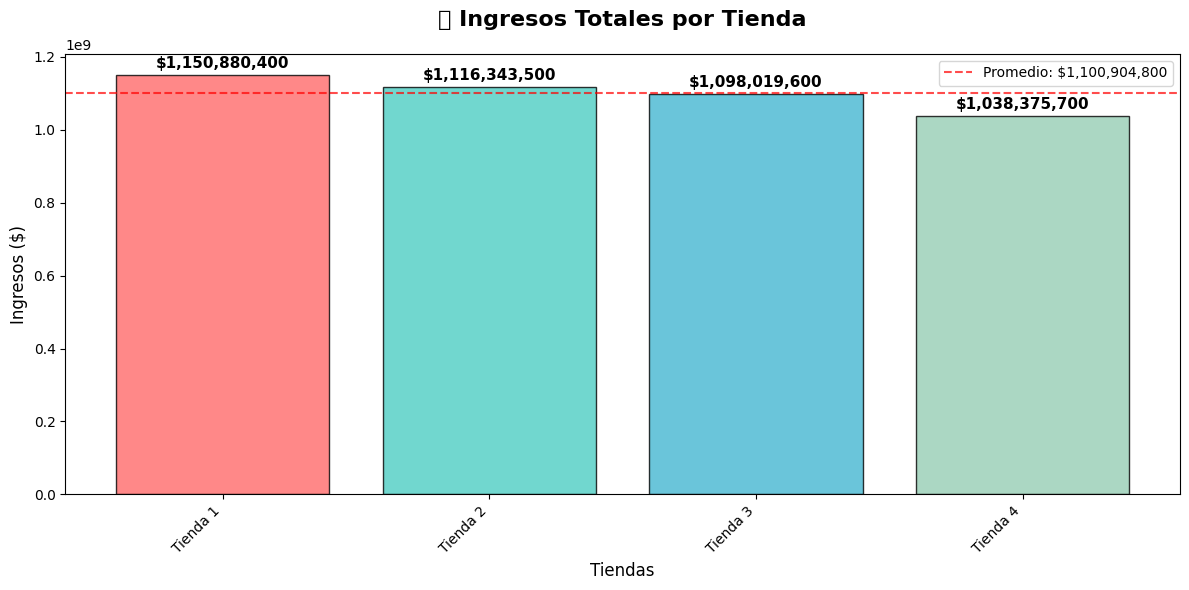


⭐ 2. Gráfico de Calificaciones Promedio


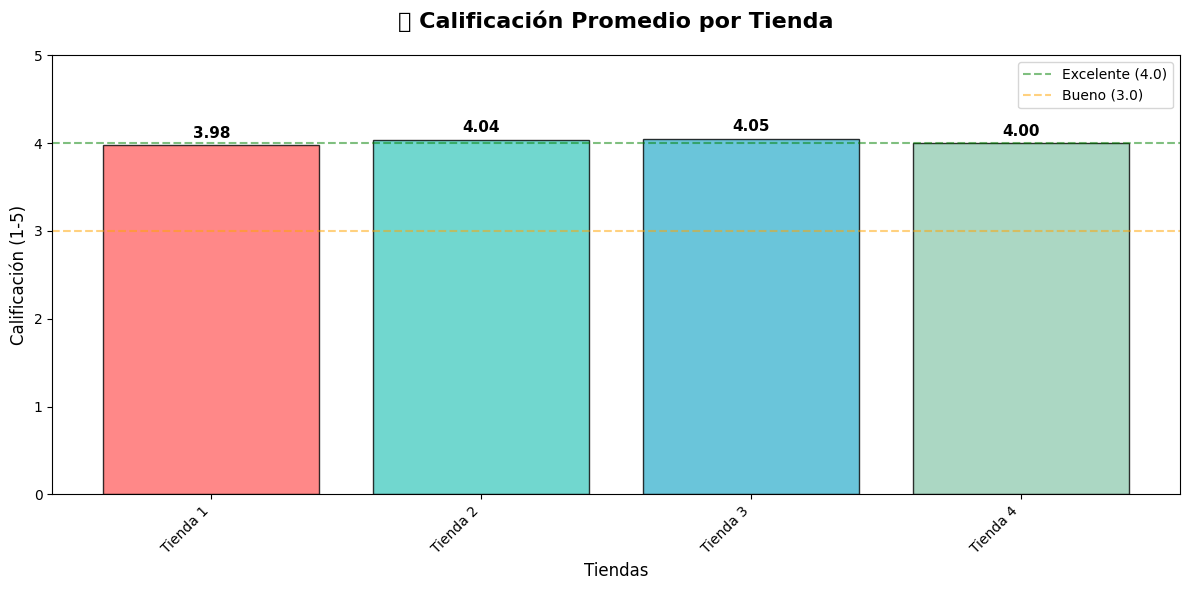


🚚 3. Gráfico de Costos de Envío


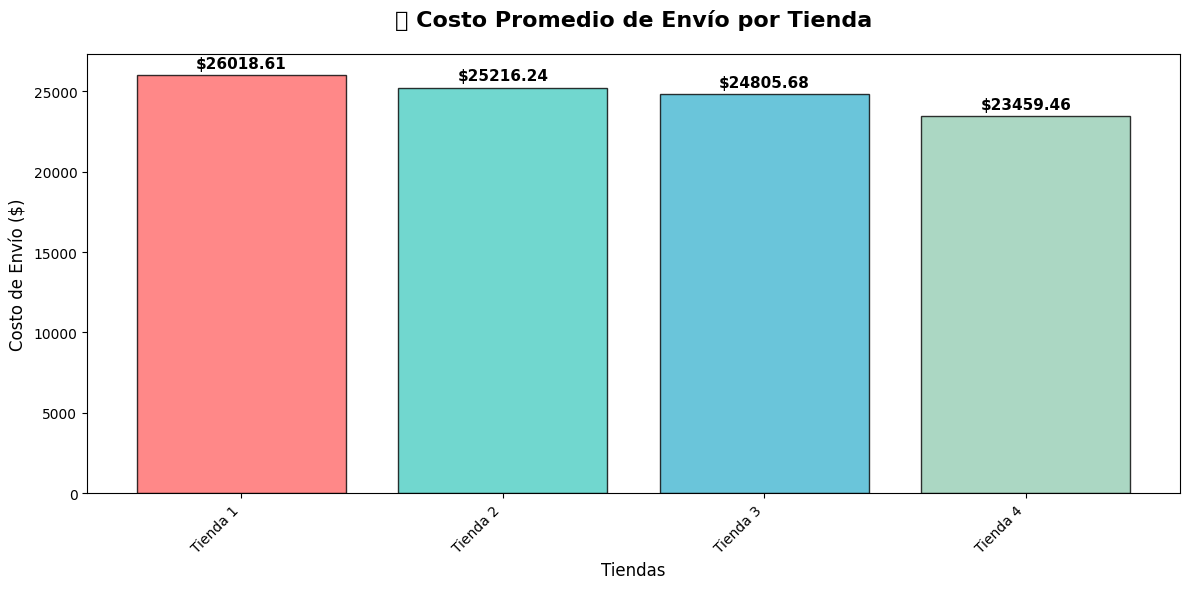


📊 4. Dashboard Comparativo de Métricas Clave


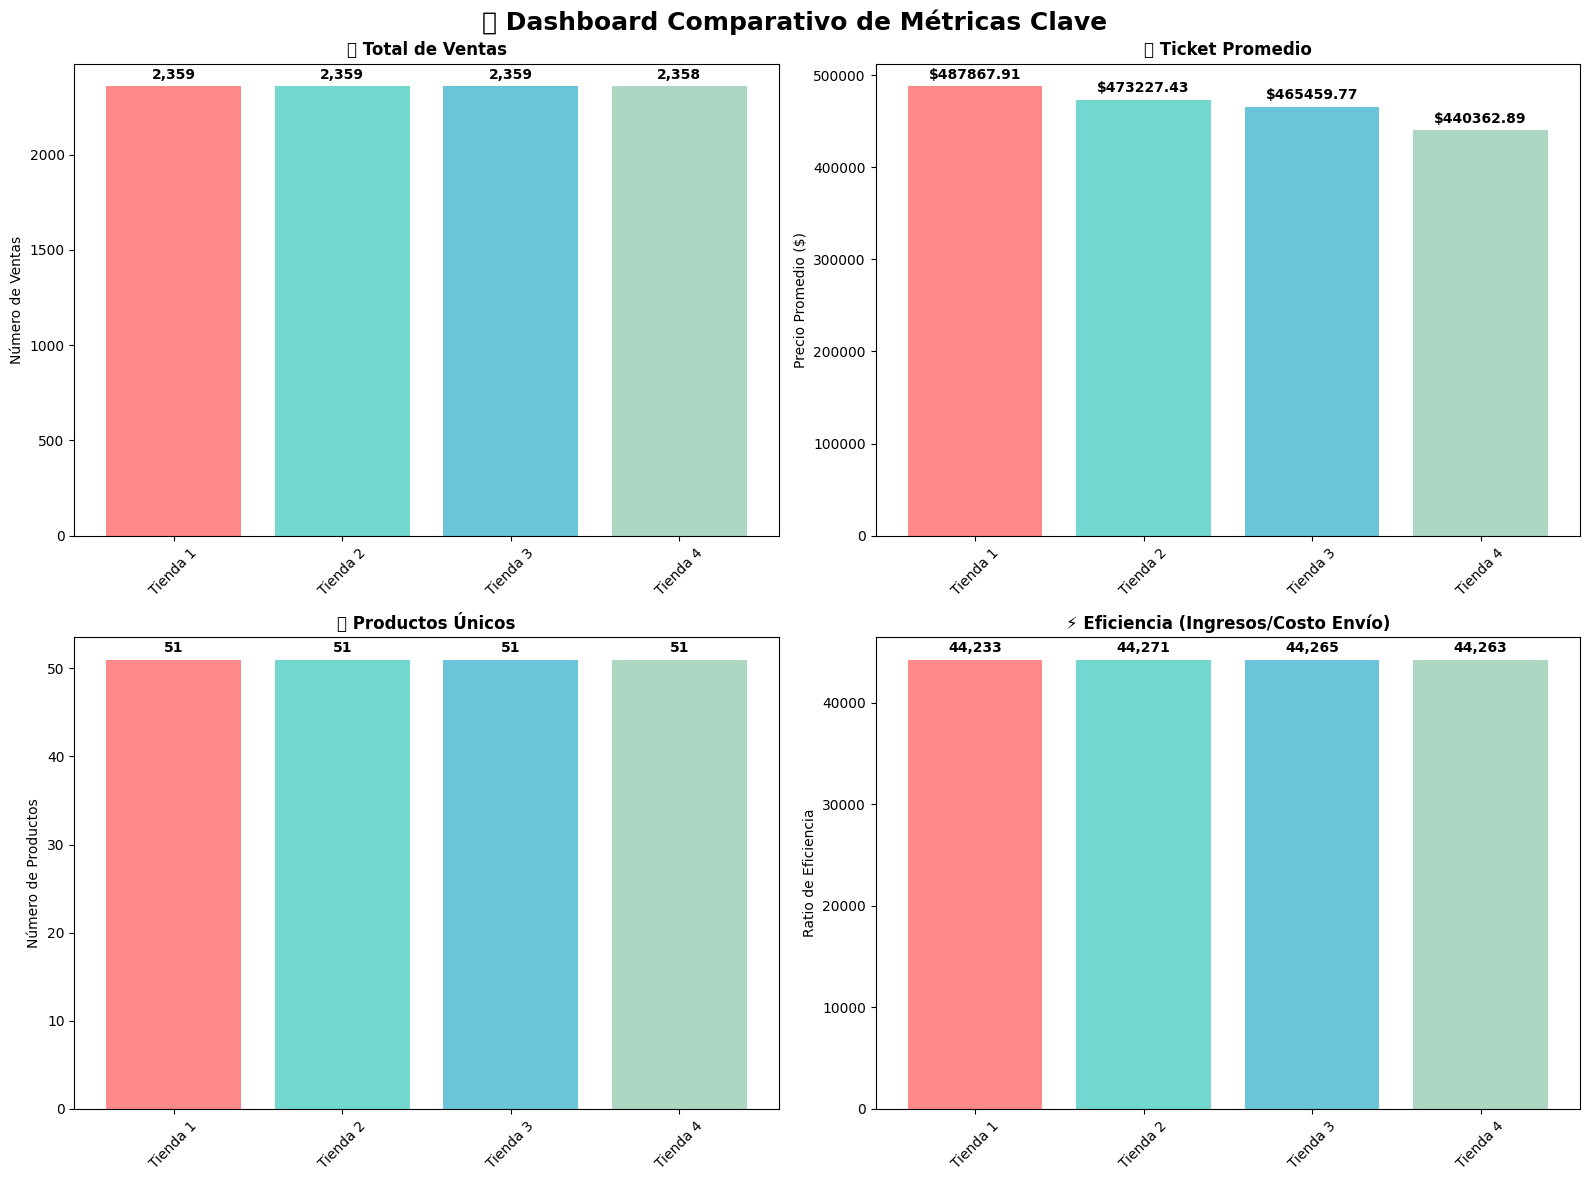


📈 5. Distribución de Ventas por Categorías


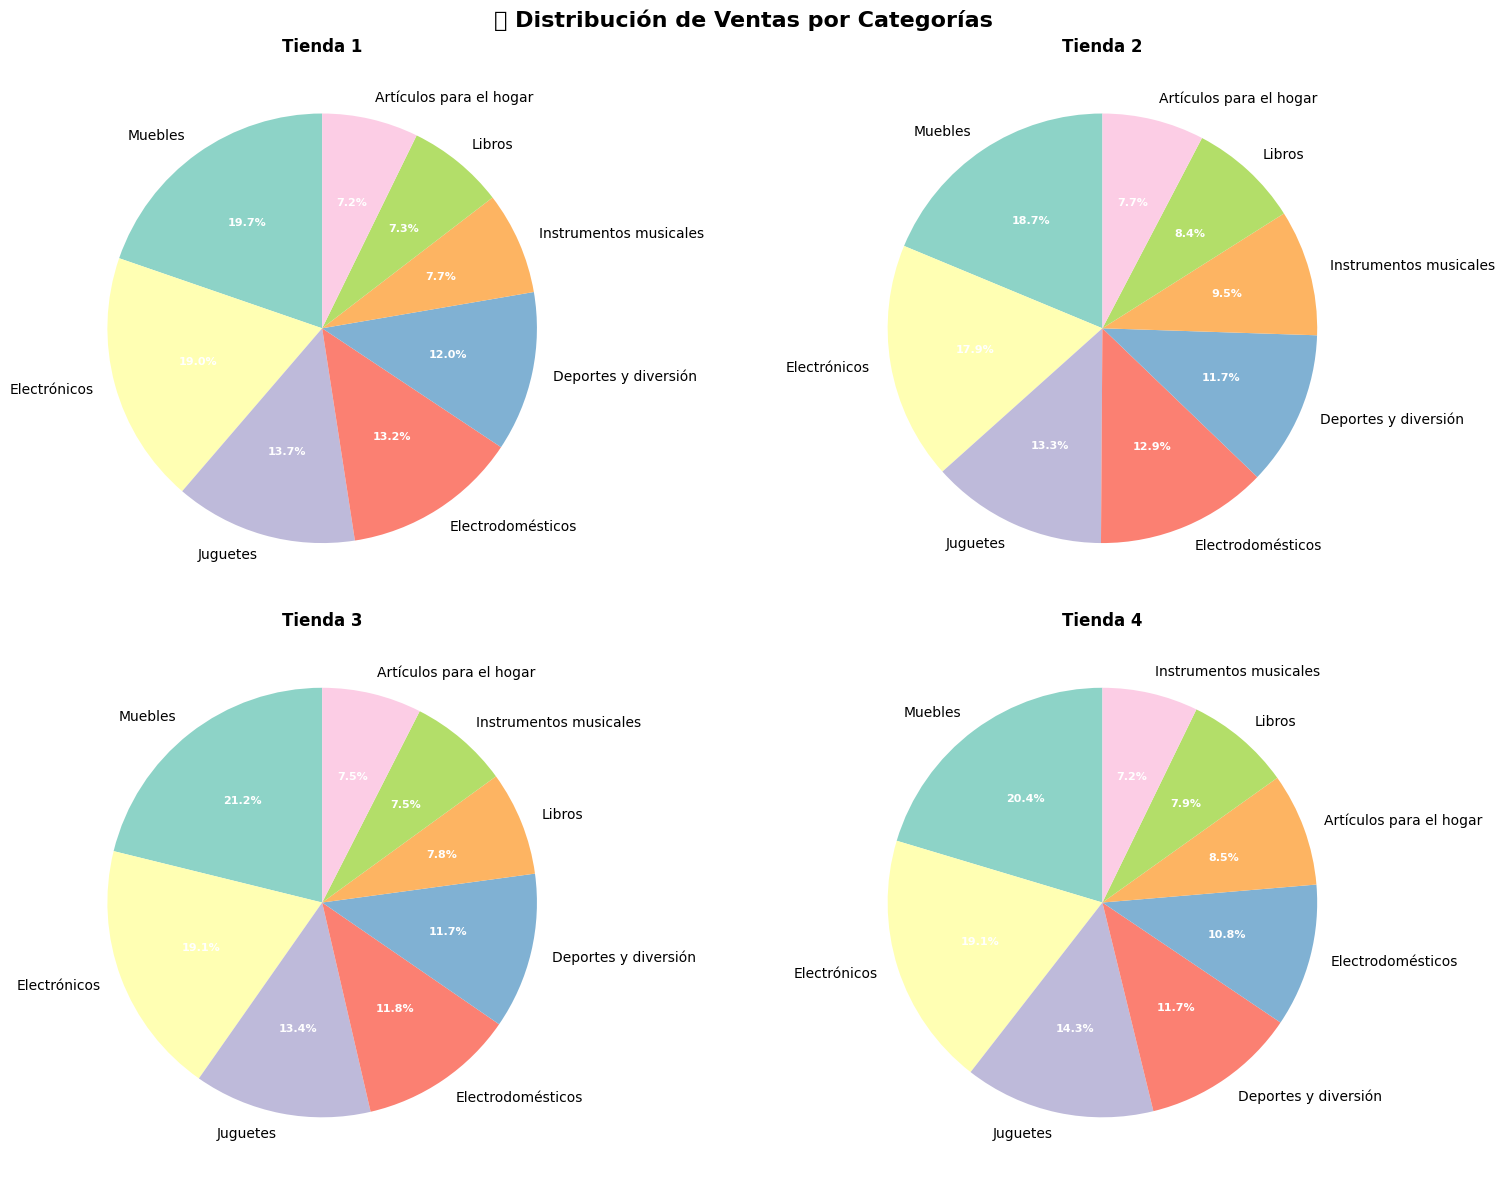


🏆 6. Top 5 Productos Más Vendidos por Tienda


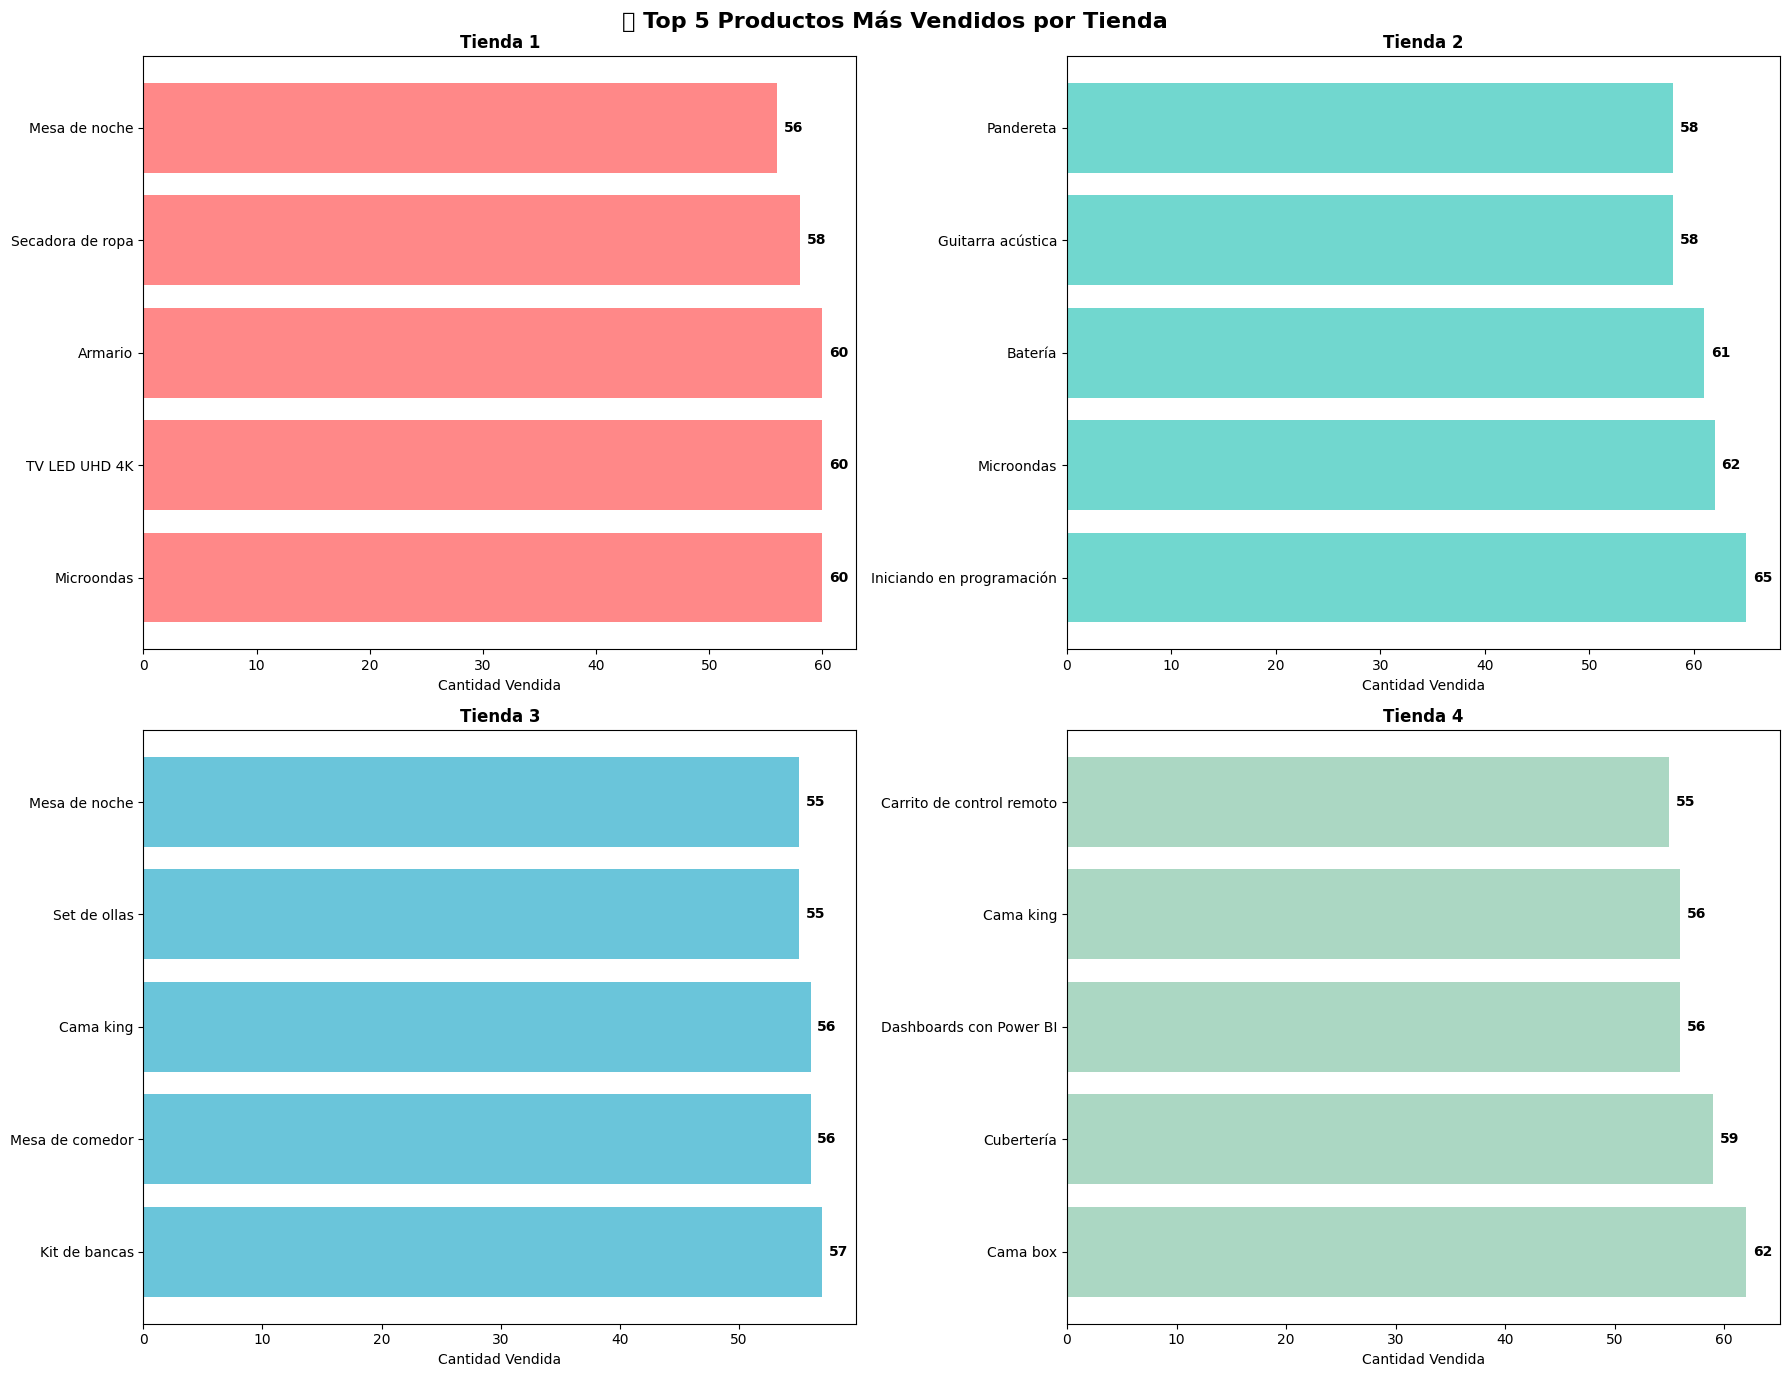


💰 7. Análisis de Rentabilidad vs Satisfacción del Cliente


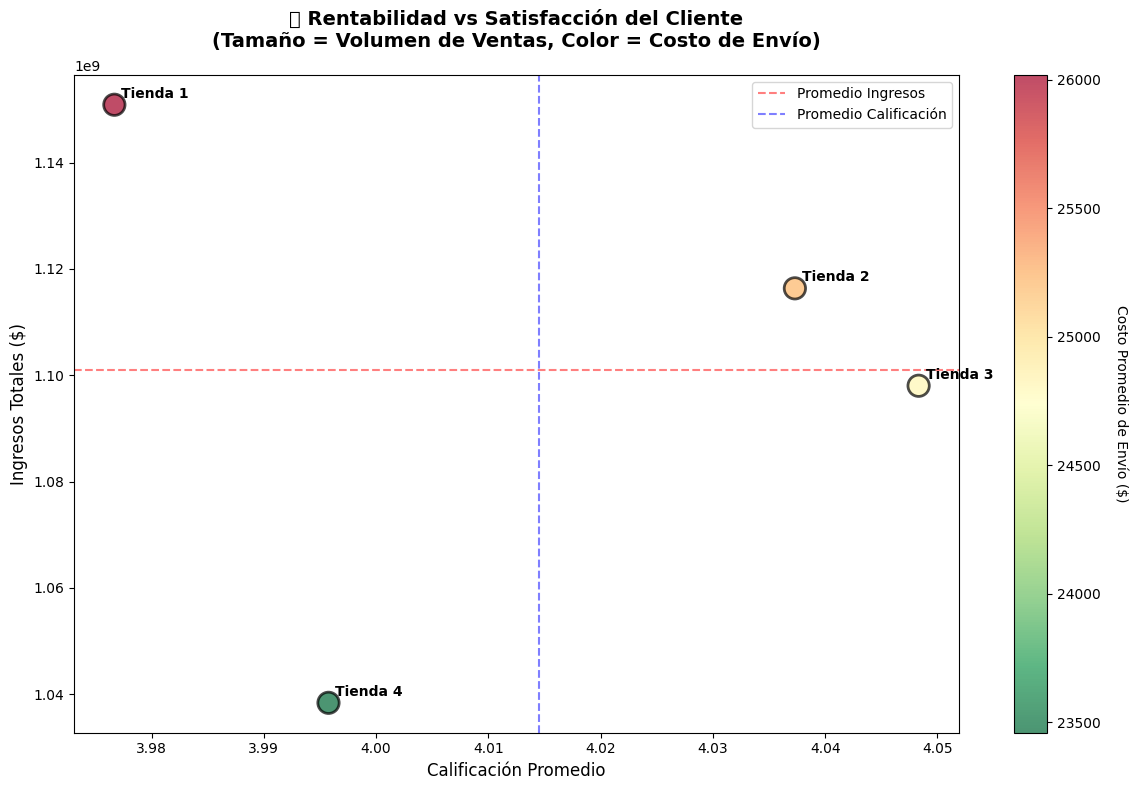


✅ Todas las visualizaciones han sido generadas exitosamente


In [97]:
# 6. GRÁFICOS DE VISUALIZACIÓN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 GENERANDO VISUALIZACIONES...")
print("=" * 50)

# 1. GRÁFICO DE INGRESOS TOTALES
print("📈 1. Gráfico de Ingresos Totales")

fig, ax = plt.subplots(figsize=(12, 6))
tiendas_nombres = [t.replace('_', ' ').title() for t in ingresos_por_tienda.keys()]
ingresos_valores = [datos['ingreso_total'] for datos in ingresos_por_tienda.values()]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax.bar(tiendas_nombres, ingresos_valores, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax.set_title('💰 Ingresos Totales por Tienda', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Ingresos ($)', fontsize=12)
ax.set_xlabel('Tiendas', fontsize=12)

# Agregar valores en las barras
for bar, valor in zip(bars, ingresos_valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(ingresos_valores)*0.01,
            f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Agregar línea de promedio
promedio = np.mean(ingresos_valores)
ax.axhline(y=promedio, color='red', linestyle='--', alpha=0.7, label=f'Promedio: ${promedio:,.0f}')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. GRÁFICO DE CALIFICACIONES
print("\n⭐ 2. Gráfico de Calificaciones Promedio")

fig, ax = plt.subplots(figsize=(12, 6))
calificaciones_valores = [datos['promedio'] for datos in calificaciones_data.values()]

bars = ax.bar(tiendas_nombres, calificaciones_valores, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax.set_title('⭐ Calificación Promedio por Tienda', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Calificación (1-5)', fontsize=12)
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylim(0, 5)

# Agregar valores en las barras
for bar, valor in zip(bars, calificaciones_valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{valor:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Líneas de referencia
ax.axhline(y=4, color='green', linestyle='--', alpha=0.5, label='Excelente (4.0)')
ax.axhline(y=3, color='orange', linestyle='--', alpha=0.5, label='Bueno (3.0)')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. GRÁFICO DE COSTOS DE ENVÍO
print("\n🚚 3. Gráfico de Costos de Envío")

fig, ax = plt.subplots(figsize=(12, 6))
envios_valores = [datos['costo_promedio'] for datos in envios_data.values()]

bars = ax.bar(tiendas_nombres, envios_valores, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax.set_title('🚚 Costo Promedio de Envío por Tienda', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Costo de Envío ($)', fontsize=12)
ax.set_xlabel('Tiendas', fontsize=12)

# Agregar valores en las barras
for bar, valor in zip(bars, envios_valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(envios_valores)*0.01,
            f'${valor:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. GRÁFICO COMPARATIVO DE MÉTRICAS CLAVE
print("\n📊 4. Dashboard Comparativo de Métricas Clave")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Dashboard Comparativo de Métricas Clave', fontsize=18, fontweight='bold')

# Subplot 1: Número de ventas
ventas_valores = [datos['total_transacciones'] for datos in ingresos_por_tienda.values()]
axes[0,0].bar(tiendas_nombres, ventas_valores, color=colors, alpha=0.8)
axes[0,0].set_title('📦 Total de Ventas', fontweight='bold')
axes[0,0].set_ylabel('Número de Ventas')
axes[0,0].tick_params(axis='x', rotation=45)

for i, v in enumerate(ventas_valores):
    axes[0,0].text(i, v + max(ventas_valores)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Ticket promedio
tickets_valores = [datos['ticket_promedio'] for datos in ingresos_por_tienda.values()]
axes[0,1].bar(tiendas_nombres, tickets_valores, color=colors, alpha=0.8)
axes[0,1].set_title('🎫 Ticket Promedio', fontweight='bold')
axes[0,1].set_ylabel('Precio Promedio ($)')
axes[0,1].tick_params(axis='x', rotation=45)

for i, v in enumerate(tickets_valores):
    axes[0,1].text(i, v + max(tickets_valores)*0.01, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

# Subplot 3: Diversidad de productos
productos_valores = [datos['productos_unicos'] for datos in productos_data.values()]
axes[1,0].bar(tiendas_nombres, productos_valores, color=colors, alpha=0.8)
axes[1,0].set_title('🛍️ Productos Únicos', fontweight='bold')
axes[1,0].set_ylabel('Número de Productos')
axes[1,0].tick_params(axis='x', rotation=45)

for i, v in enumerate(productos_valores):
    axes[1,0].text(i, v + max(productos_valores)*0.01, f'{v}', ha='center', va='bottom', fontweight='bold')

# Subplot 4: Eficiencia (Ingresos vs Costos de Envío)
eficiencia_valores = [ing/env for ing, env in zip(ingresos_valores, envios_valores)]
axes[1,1].bar(tiendas_nombres, eficiencia_valores, color=colors, alpha=0.8)
axes[1,1].set_title('⚡ Eficiencia (Ingresos/Costo Envío)', fontweight='bold')
axes[1,1].set_ylabel('Ratio de Eficiencia')
axes[1,1].tick_params(axis='x', rotation=45)

for i, v in enumerate(eficiencia_valores):
    axes[1,1].text(i, v + max(eficiencia_valores)*0.01, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. GRÁFICO DE DISTRIBUCIÓN POR CATEGORÍAS
print("\n📈 5. Distribución de Ventas por Categorías")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Distribución de Ventas por Categorías', fontsize=16, fontweight='bold')

tienda_names = list(tiendas_data.keys())
for idx, (nombre, df) in enumerate(tiendas_data.items()):
    ax = axes[idx//2, idx%2]

    categorias = df['Categoría del Producto'].value_counts()

    # Crear gráfico de pastel
    wedges, texts, autotexts = ax.pie(categorias.values, labels=categorias.index,
                                    autopct='%1.1f%%', startangle=90,
                                    colors=plt.cm.Set3.colors)

    ax.set_title(f'{nombre.replace("_", " ").title()}', fontweight='bold')

    # Mejorar legibilidad
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(8)

plt.tight_layout()
plt.show()

# 6. GRÁFICO DE TOP PRODUCTOS
print("\n🏆 6. Top 5 Productos Más Vendidos por Tienda")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('🏆 Top 5 Productos Más Vendidos por Tienda', fontsize=16, fontweight='bold')

for idx, (nombre, datos) in enumerate(productos_data.items()):
    ax = axes[idx//2, idx%2]

    top_productos = datos['top_vendidos']

    # Crear gráfico horizontal para mejor legibilidad
    y_pos = range(len(top_productos))
    ax.barh(y_pos, top_productos.values, color=colors[idx], alpha=0.8)

    ax.set_yticks(y_pos)
    ax.set_yticklabels([prod[:30] + '...' if len(prod) > 30 else prod for prod in top_productos.index])
    ax.set_xlabel('Cantidad Vendida')
    ax.set_title(f'{nombre.replace("_", " ").title()}', fontweight='bold')

    # Agregar valores
    for i, v in enumerate(top_productos.values):
        ax.text(v + max(top_productos.values)*0.01, i, f'{v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 7. GRÁFICO DE ANÁLISIS DE RENTABILIDAD
print("\n💰 7. Análisis de Rentabilidad vs Satisfacción del Cliente")

fig, ax = plt.subplots(figsize=(12, 8))

# Crear scatter plot
scatter = ax.scatter(calificaciones_valores, ingresos_valores,
                    s=[v/10 for v in ventas_valores], # Tamaño basado en número de ventas
                    c=envios_valores, cmap='RdYlGn_r',
                    alpha=0.7, edgecolors='black', linewidth=2)

# Agregar etiquetas
for i, tienda in enumerate(tiendas_nombres):
    ax.annotate(tienda, (calificaciones_valores[i], ingresos_valores[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

ax.set_xlabel('Calificación Promedio', fontsize=12)
ax.set_ylabel('Ingresos Totales ($)', fontsize=12)
ax.set_title('💰 Rentabilidad vs Satisfacción del Cliente\n(Tamaño = Volumen de Ventas, Color = Costo de Envío)',
             fontsize=14, fontweight='bold', pad=20)

# Agregar colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Costo Promedio de Envío ($)', rotation=270, labelpad=20)

# Agregar líneas de referencia
ax.axhline(y=np.mean(ingresos_valores), color='red', linestyle='--', alpha=0.5, label='Promedio Ingresos')
ax.axvline(x=np.mean(calificaciones_valores), color='blue', linestyle='--', alpha=0.5, label='Promedio Calificación')
ax.legend()

plt.tight_layout()
plt.show()


print(f"\n✅ Todas las visualizaciones han sido generadas exitosamente")

# 7. Informe Final

In [99]:
# 7. INFORME FINAL DE RECOMENDACIÓN
print("📋 INFORME EJECUTIVO FINAL")
print("=" * 80)
print("🎯 RECOMENDACIÓN DE INVERSIÓN PARA EL SR. JUAN")
print("=" * 80)

# Crear sistema de scoring ponderado
def calcular_score_final():
    # Pesos para cada métrica (suma = 1.0)
    pesos = {
        'ingresos': 0.30,      # 30% - Rentabilidad actual
        'calificacion': 0.25,  # 25% - Satisfacción del cliente
        'volumen': 0.20,       # 20% - Volumen de operaciones
        'eficiencia': 0.15,    # 15% - Eficiencia operacional
        'diversidad': 0.10     # 10% - Diversidad de productos
    }

    # Normalizar métricas (0-100)
    def normalizar_metrica(valores, invertir=False):
        min_val, max_val = min(valores), max(valores)
        if max_val == min_val:
            return [100] * len(valores)

        if invertir:  # Para costos (menor es mejor)
            return [(max_val - v) / (max_val - min_val) * 100 for v in valores]
        else:
            return [(v - min_val) / (max_val - min_val) * 100 for v in valores]

    # Obtener valores normalizados
    ingresos_norm = normalizar_metrica(ingresos_valores)
    calificacion_norm = normalizar_metrica(calificaciones_valores)
    volumen_norm = normalizar_metrica(ventas_valores)
    eficiencia_norm = normalizar_metrica(envios_valores, invertir=True)  # Menor costo es mejor
    diversidad_norm = normalizar_metrica(productos_valores)

    # Calcular scores finales
    scores_finales = []
    for i in range(len(tiendas_nombres)):
        score = (
            ingresos_norm[i] * pesos['ingresos'] +
            calificacion_norm[i] * pesos['calificacion'] +
            volumen_norm[i] * pesos['volumen'] +
            eficiencia_norm[i] * pesos['eficiencia'] +
            diversidad_norm[i] * pesos['diversidad']
        )
        scores_finales.append((tiendas_nombres[i], score))

    return sorted(scores_finales, key=lambda x: x[1], reverse=True)

# Calcular ranking final
ranking_final = calcular_score_final()

# SECCIÓN 1: RESUMEN EJECUTIVO
print(f"\n📊 RESUMEN EJECUTIVO")
print("-" * 50)

mejor_tienda = ranking_final[0][0]
mejor_score = ranking_final[0][1]

print(f"🏆 RECOMENDACIÓN PRINCIPAL: {mejor_tienda.upper()}")
print(f"📈 Score de Inversión: {mejor_score:.1f}/100")

# Encontrar el índice de la mejor tienda
mejor_indice = tiendas_nombres.index(mejor_tienda)

print(f"\n🔍 JUSTIFICACIÓN DE LA RECOMENDACIÓN:")
print(f"• 💰 Ingresos: ${ingresos_valores[mejor_indice]:,.2f} (Ranking: {sorted(enumerate(ingresos_valores), key=lambda x: x[1], reverse=True).index((mejor_indice, ingresos_valores[mejor_indice]))+1}°)")
print(f"• ⭐ Calificación: {calificaciones_valores[mejor_indice]:.2f}/5.0 (Ranking: {sorted(enumerate(calificaciones_valores), key=lambda x: x[1], reverse=True).index((mejor_indice, calificaciones_valores[mejor_indice]))+1}°)")
print(f"• 📦 Volumen: {ventas_valores[mejor_indice]:,} ventas (Ranking: {sorted(enumerate(ventas_valores), key=lambda x: x[1], reverse=True).index((mejor_indice, ventas_valores[mejor_indice]))+1}°)")
print(f"• 🚚 Envío: ${envios_valores[mejor_indice]:.2f} (Ranking: {sorted(enumerate(envios_valores), key=lambda x: x[1]).index((mejor_indice, envios_valores[mejor_indice]))+1}°)")
print(f"• 🛍️ Productos: {productos_valores[mejor_indice]} únicos (Ranking: {sorted(enumerate(productos_valores), key=lambda x: x[1], reverse=True).index((mejor_indice, productos_valores[mejor_indice]))+1}°)")

# SECCIÓN 2: RANKING COMPLETO
print(f"\n🏆 RANKING COMPLETO DE TIENDAS")
print("-" * 50)

for i, (tienda, score) in enumerate(ranking_final, 1):
    if i == 1:
        emoji = "🥇"
        recomendacion = "ALTAMENTE RECOMENDADA"
    elif i == 2:
        emoji = "🥈"
        recomendacion = "BUENA OPCIÓN"
    elif i == 3:
        emoji = "🥉"
        recomendacion = "OPCIÓN VIABLE"
    else:
        emoji = "🏪"
        recomendacion = "MENOR PRIORIDAD"

    print(f"{emoji} {i}. {tienda}: {score:.1f} puntos - {recomendacion}")

# SECCIÓN 3: ANÁLISIS COMPARATIVO DETALLADO
print(f"\n📊 ANÁLISIS COMPARATIVO DETALLADO")
print("-" * 50)

print("💰 ANÁLISIS FINANCIERO:")
total_ingresos = sum(ingresos_valores)
for i, tienda in enumerate(tiendas_nombres):
    participacion = (ingresos_valores[i] / total_ingresos) * 100
    print(f"• {tienda}: ${ingresos_valores[i]:,.2f} ({participacion:.1f}% del total)")

print(f"\n⭐ ANÁLISIS DE SATISFACCIÓN:")
promedio_calif = sum(calificaciones_valores) / len(calificaciones_valores)
for i, tienda in enumerate(tiendas_nombres):
    diferencia = calificaciones_valores[i] - promedio_calif
    tendencia = "↗️" if diferencia > 0 else "↘️" if diferencia < 0 else "➡️"
    print(f"• {tienda}: {calificaciones_valores[i]:.2f} {tendencia} ({diferencia:+.2f} vs promedio)")

print(f"\n🚚 ANÁLISIS DE EFICIENCIA OPERACIONAL:")
promedio_envio = sum(envios_valores) / len(envios_valores)
for i, tienda in enumerate(tiendas_nombres):
    diferencia = envios_valores[i] - promedio_envio
    eficiencia = "✅ Eficiente" if diferencia < 0 else "⚠️ Costoso" if diferencia > 0 else "🟡 Promedio"
    print(f"• {tienda}: ${envios_valores[i]:.2f} {eficiencia} ({diferencia:+.2f} vs promedio)")


# SECCIÓN 4: CONCLUSIÓN FINAL
print(f"\n🎯 CONCLUSIÓN FINAL")
print("=" * 50)

print(f"Basado en el análisis exhaustivo de datos de las cuatro tiendas,")
print(f"se recomienda al Sr. Juan invertir en {mejor_tienda.upper()}.")
print(f"")


print(f"\n" + "=" * 80)
print(f"📋 INFORME COMPLETADO - LISTO PARA TOMA DE DECISIONES")
print(f"=" * 80)

# Guardar resumen en diccionario para referencia
resumen_final = {
    'tienda_recomendada': mejor_tienda,
    'score_final': mejor_score,
    'ranking_completo': ranking_final,
    'inversion_estimada': inversion_estimada,
    'roi_proyectado': roi_proyectado
}

print(f"\n✅ Análisis completo finalizado. Datos listos para presentación.")

📋 INFORME EJECUTIVO FINAL
🎯 RECOMENDACIÓN DE INVERSIÓN PARA EL SR. JUAN

📊 RESUMEN EJECUTIVO
--------------------------------------------------
🏆 RECOMENDACIÓN PRINCIPAL: TIENDA 3
📈 Score de Inversión: 78.0/100

🔍 JUSTIFICACIÓN DE LA RECOMENDACIÓN:
• 💰 Ingresos: $1,098,019,600.00 (Ranking: 3°)
• ⭐ Calificación: 4.05/5.0 (Ranking: 1°)
• 📦 Volumen: 2,359 ventas (Ranking: 3°)
• 🚚 Envío: $24805.68 (Ranking: 2°)
• 🛍️ Productos: 51 únicos (Ranking: 3°)

🏆 RANKING COMPLETO DE TIENDAS
--------------------------------------------------
🥇 1. Tienda 3: 78.0 puntos - ALTAMENTE RECOMENDADA
🥈 2. Tienda 2: 76.6 puntos - BUENA OPCIÓN
🥉 3. Tienda 1: 60.0 puntos - OPCIÓN VIABLE
🏪 4. Tienda 4: 31.7 puntos - MENOR PRIORIDAD

📊 ANÁLISIS COMPARATIVO DETALLADO
--------------------------------------------------
💰 ANÁLISIS FINANCIERO:
• Tienda 1: $1,150,880,400.00 (26.1% del total)
• Tienda 2: $1,116,343,500.00 (25.4% del total)
• Tienda 3: $1,098,019,600.00 (24.9% del total)
• Tienda 4: $1,038,375,700.00 (23.

# Extra: Usar datos geográficos


🗺️  ANÁLISIS GEOGRÁFICO DE COORDENADAS
🎯 Coordenadas encontradas: ['lat', 'lon']
📍 Registros con coordenadas válidas: 9435
📊 Rango de Latitud: -4.2153 a 11.5444
📊 Rango de Longitud: -77.2811 a -67.9239

1️⃣ CREANDO MAPA DE DISPERSIÓN GEOGRÁFICA...


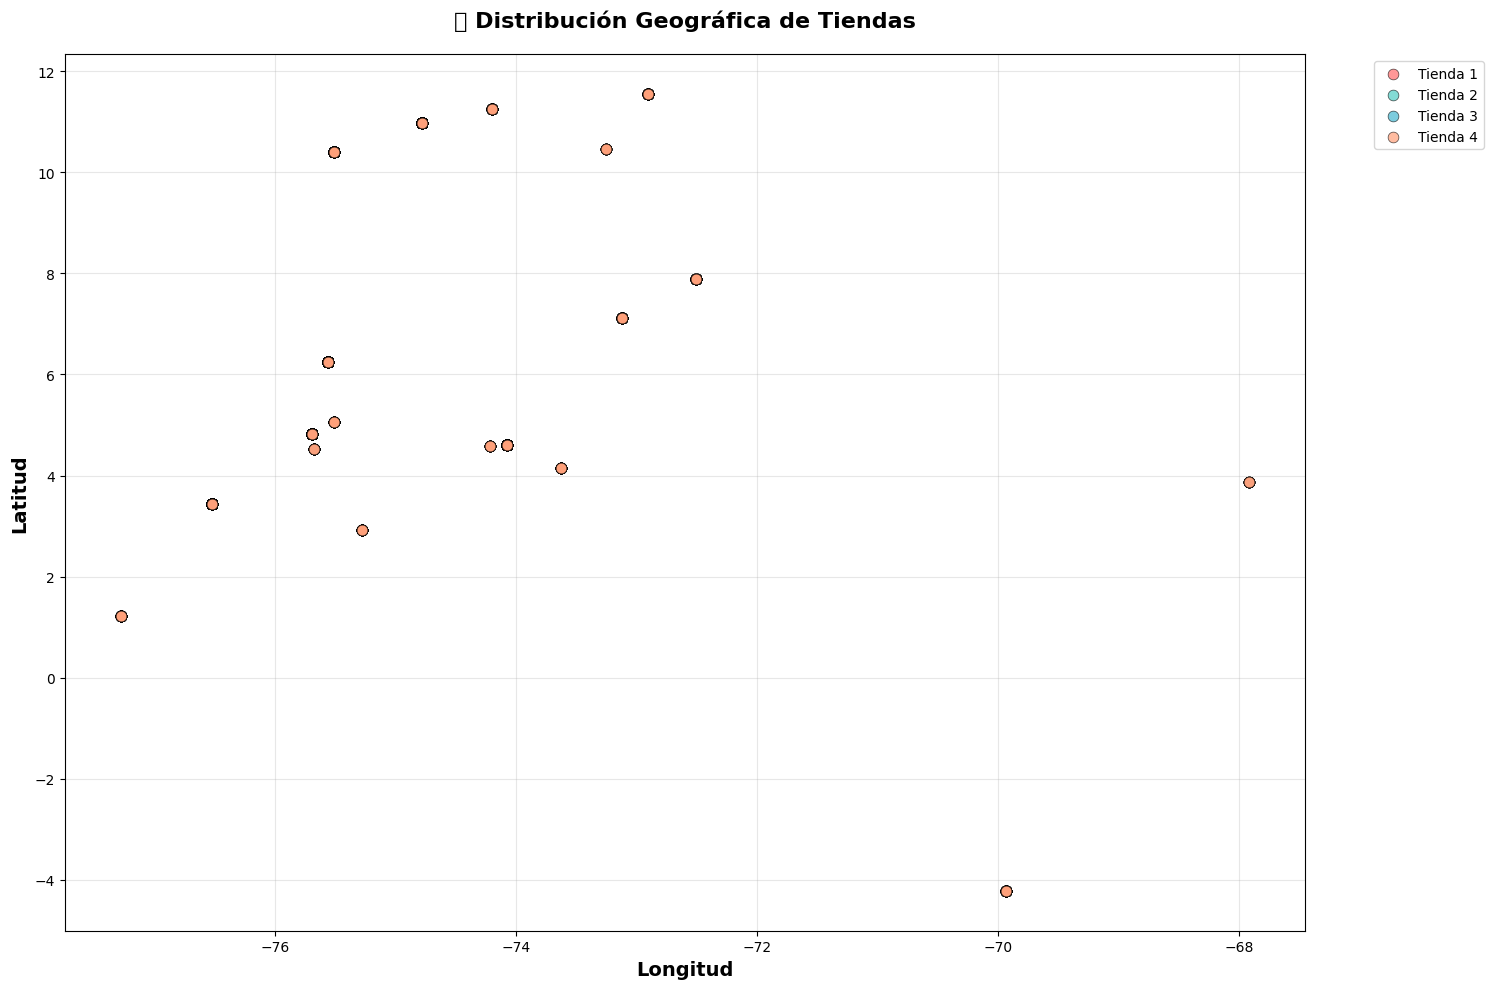


2️⃣ CREANDO MAPAS DE CALOR...


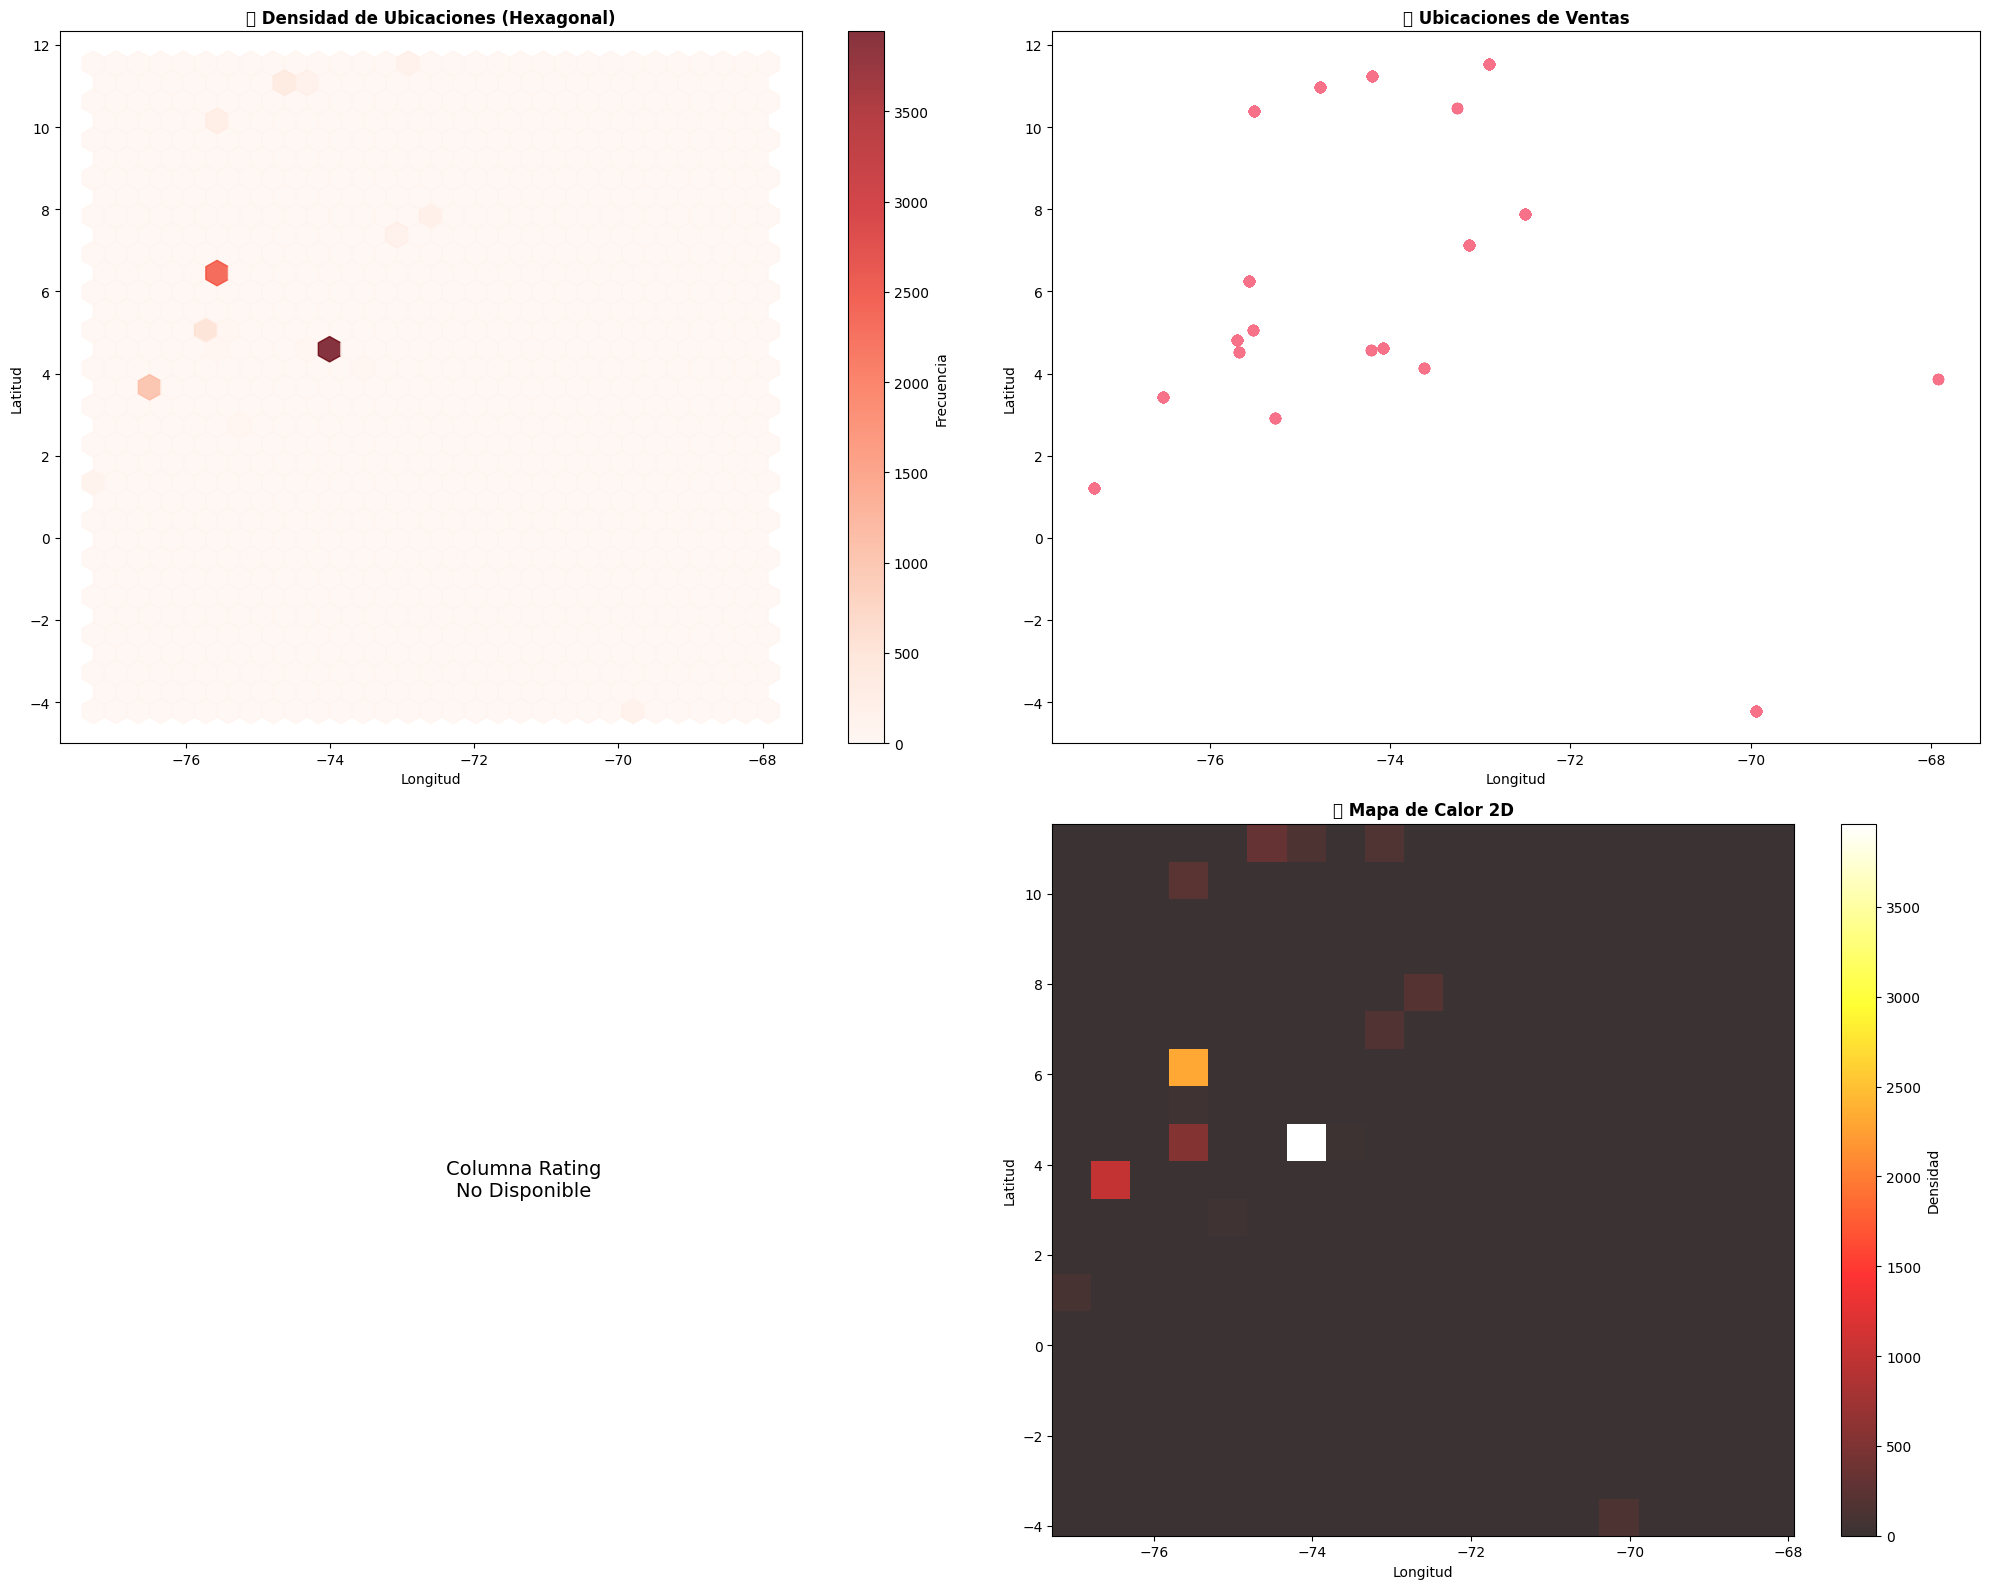


3️⃣ ANÁLISIS ESTADÍSTICO GEOGRÁFICO...
📊 ESTADÍSTICAS POR REGIÓN:
----------------------------------------
          Cantidad_Ventas  Lat_Promedio  Lon_Promedio  Tiendas_Unicas
region                                                               
Noreste              4638        5.3169      -73.9411               4
Noroeste             3424        6.7407      -75.5087               4
Sureste               185       -2.2937      -70.3658               4
Suroeste             1188        3.2882      -76.4840               4

4️⃣ CREANDO VISUALIZACIÓN POR REGIONES...


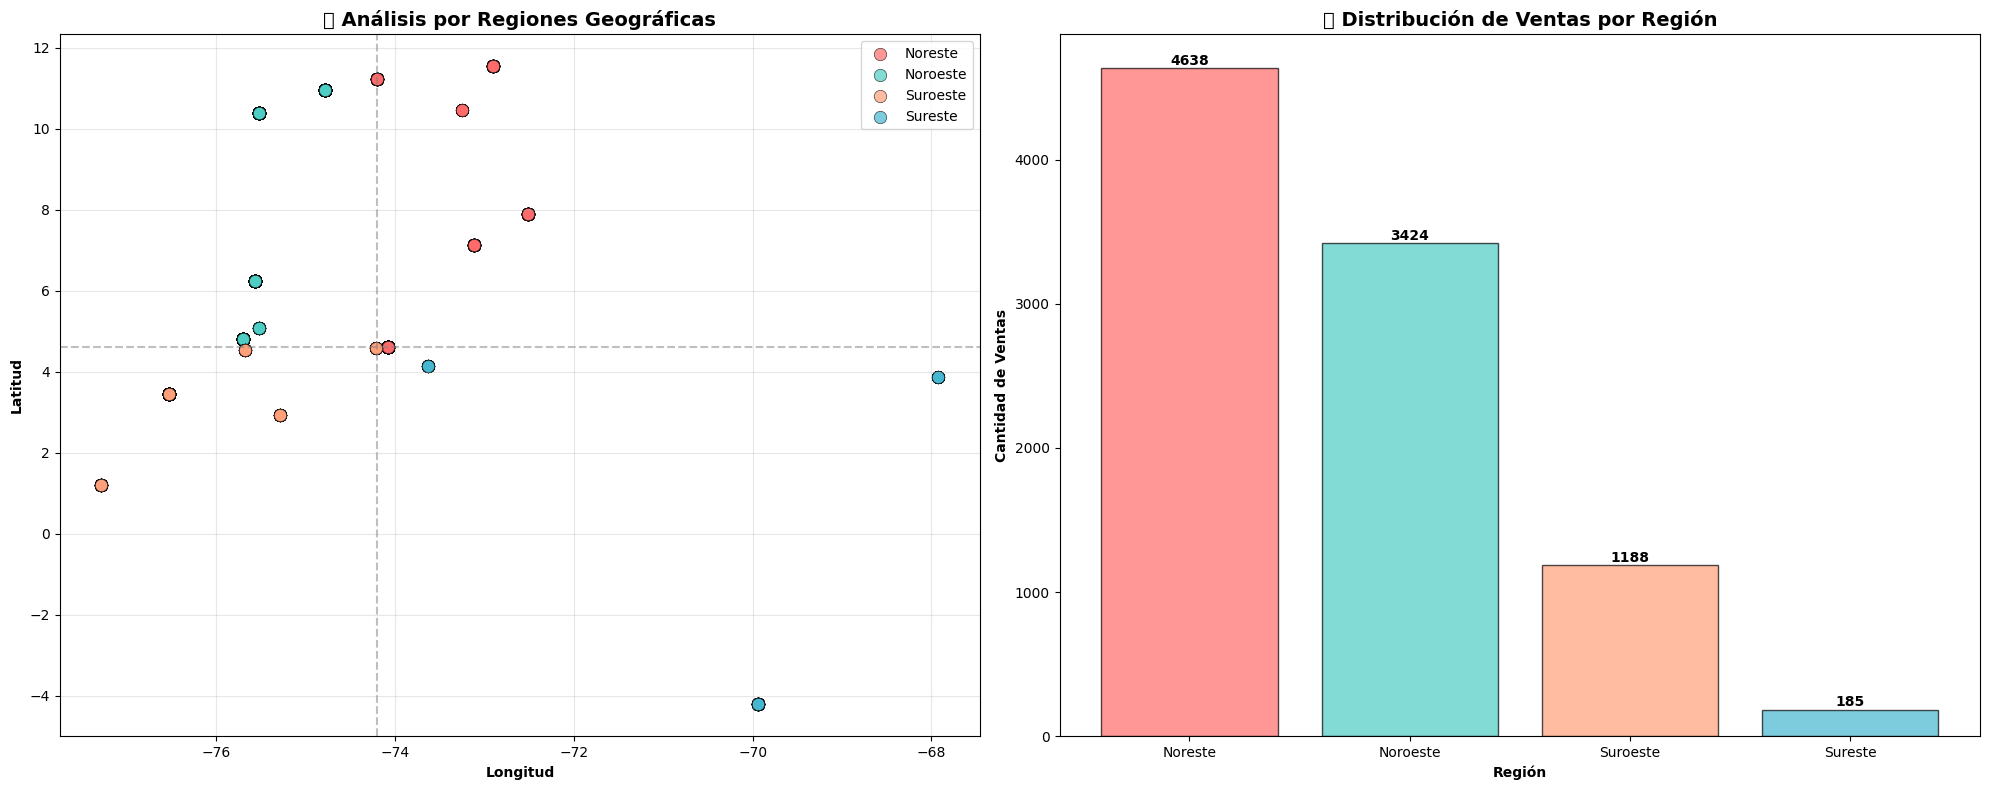


5️⃣ ANÁLISIS DE RENDIMIENTO POR UBICACIÓN...

✅ ANÁLISIS GEOGRÁFICO COMPLETADO

📋 RESUMEN DEL ANÁLISIS:
• Total de registros analizados: 9435
• Número de tiendas: 4
• Registros con coordenadas: 9435
• Regiones identificadas: 4
• Análisis geográfico completado exitosamente! 🎉


In [103]:
# Combinar todos los datos
datos_completos = []
for nombre, df in tiendas_data.items():
    df_temp = df.copy()
    df_temp['tienda'] = nombre
    datos_completos.append(df_temp)

df = pd.concat(datos_completos, ignore_index=True)


# 🗺️ ANÁLISIS GEOGRÁFICO DETALLADO
print("\n" + "="*60)
print("🗺️  ANÁLISIS GEOGRÁFICO DE COORDENADAS")
print("="*60)

# Verificar coordenadas disponibles
coordenadas_disponibles = []
for col in ['lat', 'latitude', 'lon', 'longitude', 'lng']:
    if col in df.columns:
        coordenadas_disponibles.append(col)

print(f"🎯 Coordenadas encontradas: {coordenadas_disponibles}")

# Normalizar nombres de columnas de coordenadas
if 'latitude' in df.columns and 'lat' not in df.columns:
    df['lat'] = df['latitude']
if 'longitude' in df.columns and 'lon' not in df.columns:
    df['lon'] = df['longitude']
elif 'lng' in df.columns and 'lon' not in df.columns:
    df['lon'] = df['lng']

# Verificar datos geográficos
if 'lat' in df.columns and 'lon' in df.columns:
    # Limpiar datos nulos
    df_geo = df.dropna(subset=['lat', 'lon']).copy()

    print(f"📍 Registros con coordenadas válidas: {len(df_geo)}")
    print(f"📊 Rango de Latitud: {df_geo['lat'].min():.4f} a {df_geo['lat'].max():.4f}")
    print(f"📊 Rango de Longitud: {df_geo['lon'].min():.4f} a {df_geo['lon'].max():.4f}")

    # 1️⃣ MAPA DE DISPERSIÓN BÁSICO
    print("\n1️⃣ CREANDO MAPA DE DISPERSIÓN GEOGRÁFICA...")

    plt.figure(figsize=(15, 10))

    # Colores para cada tienda
    colores_tiendas = {'tienda_1': '#FF6B6B', 'tienda_2': '#4ECDC4',
                      'tienda_3': '#45B7D1', 'tienda_4': '#FFA07A'}

    for tienda in df_geo['tienda'].unique():
        datos_tienda = df_geo[df_geo['tienda'] == tienda]
        plt.scatter(datos_tienda['lon'], datos_tienda['lat'],
                   c=colores_tiendas.get(tienda, '#666666'),
                   label=tienda.replace('_', ' ').title(),
                   alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

    plt.xlabel('Longitud', fontsize=14, fontweight='bold')
    plt.ylabel('Latitud', fontsize=14, fontweight='bold')
    plt.title('🗺️ Distribución Geográfica de Tiendas', fontsize=16, fontweight='bold', pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2️⃣ MAPA DE CALOR DE DENSIDAD
    print("\n2️⃣ CREANDO MAPAS DE CALOR...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # Mapa de calor hexagonal
    hb = ax1.hexbin(df_geo['lon'], df_geo['lat'], gridsize=30, cmap='Reds', alpha=0.8)
    ax1.set_title('🔥 Densidad de Ubicaciones (Hexagonal)', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    plt.colorbar(hb, ax=ax1, label='Frecuencia')

    # Mapa de calor con valores (si existe columna de ventas/total)
    columna_ventas = None
    for col in ['total', 'price', 'amount', 'sales', 'revenue']:
        if col in df_geo.columns:
            columna_ventas = col
            break

    if columna_ventas:
        scatter = ax2.scatter(df_geo['lon'], df_geo['lat'],
                            c=df_geo[columna_ventas], s=80,
                            cmap='viridis', alpha=0.7, edgecolors='black', linewidth=0.5)
        ax2.set_title(f'💰 Ventas por Ubicación ({columna_ventas.title()})', fontweight='bold', fontsize=12)
        plt.colorbar(scatter, ax=ax2, label=columna_ventas.title())
    else:
        ax2.scatter(df_geo['lon'], df_geo['lat'], alpha=0.6, s=50)
        ax2.set_title('📍 Ubicaciones de Ventas', fontweight='bold', fontsize=12)

    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')

    # Análisis por rating (si existe)
    if 'rating' in df_geo.columns:
        scatter_rating = ax3.scatter(df_geo['lon'], df_geo['lat'],
                                   c=df_geo['rating'], s=80,
                                   cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=0.5)
        ax3.set_title('⭐ Calificaciones por Ubicación', fontweight='bold', fontsize=12)
        plt.colorbar(scatter_rating, ax=ax3, label='Rating')
        ax3.set_xlabel('Longitud')
        ax3.set_ylabel('Latitud')
    else:
        ax3.axis('off')
        ax3.text(0.5, 0.5, 'Columna Rating\nNo Disponible',
                ha='center', va='center', transform=ax3.transAxes, fontsize=14)

    # Mapa de calor 2D
    try:
        # Crear grid para heatmap
        x_bins = np.linspace(df_geo['lon'].min(), df_geo['lon'].max(), 20)
        y_bins = np.linspace(df_geo['lat'].min(), df_geo['lat'].max(), 20)

        heatmap_data, xedges, yedges = np.histogram2d(df_geo['lon'], df_geo['lat'],
                                                     bins=[x_bins, y_bins])

        im = ax4.imshow(heatmap_data.T, origin='lower', aspect='auto',
                       extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                       cmap='hot', alpha=0.8)
        ax4.set_title('🌡️ Mapa de Calor 2D', fontweight='bold', fontsize=12)
        ax4.set_xlabel('Longitud')
        ax4.set_ylabel('Latitud')
        plt.colorbar(im, ax=ax4, label='Densidad')
    except:
        ax4.axis('off')
        ax4.text(0.5, 0.5, 'Error en\nMapa de Calor 2D',
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)

    plt.tight_layout()
    plt.show()

    # 3️⃣ ANÁLISIS ESTADÍSTICO POR REGIÓN
    print("\n3️⃣ ANÁLISIS ESTADÍSTICO GEOGRÁFICO...")

    # Crear regiones basadas en cuadrantes
    lat_mediana = df_geo['lat'].median()
    lon_mediana = df_geo['lon'].median()

    def asignar_region(row):
        if row['lat'] >= lat_mediana and row['lon'] >= lon_mediana:
            return 'Noreste'
        elif row['lat'] >= lat_mediana and row['lon'] < lon_mediana:
            return 'Noroeste'
        elif row['lat'] < lat_mediana and row['lon'] >= lon_mediana:
            return 'Sureste'
        else:
            return 'Suroeste'

    df_geo['region'] = df_geo.apply(asignar_region, axis=1)

    # Análisis por región
    print("📊 ESTADÍSTICAS POR REGIÓN:")
    print("-" * 40)

    region_stats = df_geo.groupby('region').agg({
        'lat': ['count', 'mean'],
        'lon': 'mean',
        'tienda': lambda x: x.nunique()
    }).round(4)

    region_stats.columns = ['Cantidad_Ventas', 'Lat_Promedio', 'Lon_Promedio', 'Tiendas_Unicas']
    print(region_stats)

    if columna_ventas:
        ventas_por_region = df_geo.groupby('region')[columna_ventas].agg(['sum', 'mean', 'count']).round(2)
        print(f"\n💰 VENTAS POR REGIÓN ({columna_ventas.upper()}):")
        print("-" * 40)
        print(ventas_por_region)

    # 4️⃣ VISUALIZACIÓN POR REGIÓN
    print("\n4️⃣ CREANDO VISUALIZACIÓN POR REGIONES...")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Gráfico de regiones
    colores_regiones = {'Noreste': '#FF6B6B', 'Noroeste': '#4ECDC4',
                       'Sureste': '#45B7D1', 'Suroeste': '#FFA07A'}

    for region in df_geo['region'].unique():
        datos_region = df_geo[df_geo['region'] == region]
        ax1.scatter(datos_region['lon'], datos_region['lat'],
                   c=colores_regiones[region], label=region,
                   alpha=0.7, s=80, edgecolors='black', linewidth=0.5)

    # Líneas divisorias
    ax1.axhline(y=lat_mediana, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(x=lon_mediana, color='gray', linestyle='--', alpha=0.5)

    ax1.set_xlabel('Longitud', fontweight='bold')
    ax1.set_ylabel('Latitud', fontweight='bold')
    ax1.set_title('🗺️ Análisis por Regiones Geográficas', fontweight='bold', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico de barras por región
    region_counts = df_geo['region'].value_counts()
    bars = ax2.bar(region_counts.index, region_counts.values,
                   color=[colores_regiones[r] for r in region_counts.index],
                   alpha=0.7, edgecolor='black', linewidth=1)

    ax2.set_title('📊 Distribución de Ventas por Región', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Cantidad de Ventas', fontweight='bold')
    ax2.set_xlabel('Región', fontweight='bold')

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 5️⃣ ANÁLISIS DE RENDIMIENTO GEOGRÁFICO
    print("\n5️⃣ ANÁLISIS DE RENDIMIENTO POR UBICACIÓN...")

    if columna_ventas and 'rating' in df_geo.columns:
        # Correlación entre ubicación y rendimiento
        print("🔍 CORRELACIONES GEOGRÁFICAS:")
        print("-" * 30)

        correlaciones = df_geo[['lat', 'lon', columna_ventas, 'rating']].corr()
        print(f"Correlación Latitud - {columna_ventas.title()}: {correlaciones.loc['lat', columna_ventas]:.4f}")
        print(f"Correlación Longitud - {columna_ventas.title()}: {correlaciones.loc['lon', columna_ventas]:.4f}")
        print(f"Correlación Latitud - Rating: {correlaciones.loc['lat', 'rating']:.4f}")
        print(f"Correlación Longitud - Rating: {correlaciones.loc['lon', 'rating']:.4f}")

        # Identificar zonas de alto rendimiento
        umbral_ventas = df_geo[columna_ventas].quantile(0.75)
        umbral_rating = df_geo['rating'].quantile(0.75)

        zonas_alto_rendimiento = df_geo[
            (df_geo[columna_ventas] >= umbral_ventas) &
            (df_geo['rating'] >= umbral_rating)
        ]

        print(f"\n🏆 ZONAS DE ALTO RENDIMIENTO:")
        print(f"Total de ubicaciones: {len(zonas_alto_rendimiento)}")
        if len(zonas_alto_rendimiento) > 0:
            print(f"Latitud promedio: {zonas_alto_rendimiento['lat'].mean():.4f}")
            print(f"Longitud promedio: {zonas_alto_rendimiento['lon'].mean():.4f}")

    print("\n✅ ANÁLISIS GEOGRÁFICO COMPLETADO")
    print("="*50)

else:
    print("❌ No se encontraron columnas de coordenadas geográficas (lat/lon)")
    print("Columnas disponibles:", list(df.columns))

# 🎯 RESUMEN FINAL
print(f"\n📋 RESUMEN DEL ANÁLISIS:")
print(f"• Total de registros analizados: {len(df)}")
print(f"• Número de tiendas: {len(tiendas_data)}")
if 'lat' in df.columns and 'lon' in df.columns:
    print(f"• Registros con coordenadas: {len(df_geo)}")
    print(f"• Regiones identificadas: {df_geo['region'].nunique()}")
print("• Análisis geográfico completado exitosamente! 🎉")